# Question

## Implement a KNN model to classify the animals in to categorie

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

In [7]:
zoo = pd.read_csv(r"C:\Users\Madhu\Downloads\Zoo.csv")

In [8]:
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [9]:
zoo.head(10)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [10]:
zoo.shape

(101, 18)

In [11]:
zoo.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [12]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [13]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [14]:
## Preprocessing
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
zoo["animal name"] = label_encoder.fit_transform(zoo["animal name"])

In [15]:
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,95,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,96,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,97,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,98,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


# Data exploration and visualizaion

## Visualizing has hair or not ?

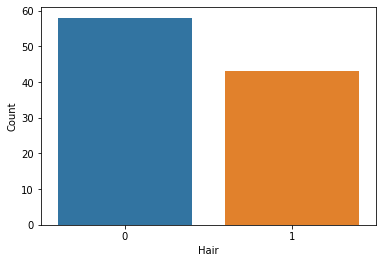

0    58
1    43
Name: hair, dtype: int64

In [17]:
sns.countplot(x="hair", data=zoo)
plt.xlabel("Hair")
plt.ylabel("Count")
plt.show()
zoo.loc[:,'hair'].value_counts()

# KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
x,y = zoo.loc[:,zoo.columns != 'hair'], zoo.loc[:,'hair']
knn.fit(x,y)
prediction = knn.predict(x)
print("Prediction = ",prediction)

Prediction =  [1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1
 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0]


# Train Test Split

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
knn = KNeighborsClassifier(n_neighbors = 1)
x,y = zoo.loc[:,zoo.columns != 'hair'], zoo.loc[:,'hair']
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('With KNN (K=1) accuracy is: ',knn.score(x_test,y_test)) # accuracy

With KNN (K=1) accuracy is:  0.5806451612903226


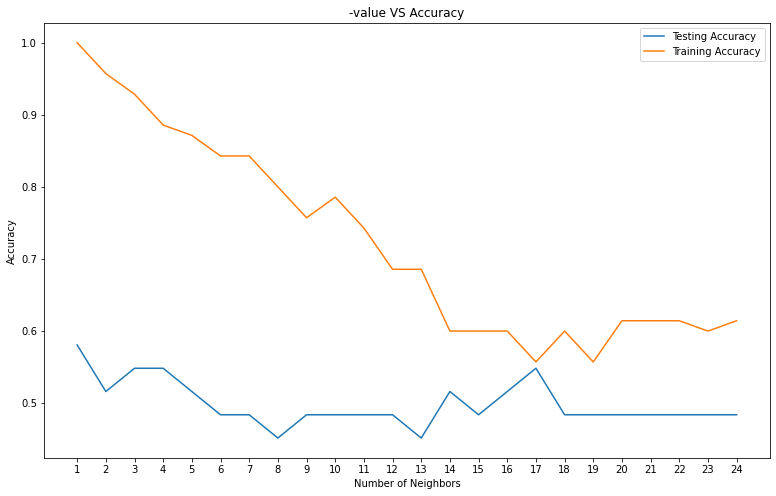

Best accuracy is 0.5806451612903226 with K = 1


In [20]:
k_values = np.arange(1,25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

    # Plot
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))


# Visualizing Eggs and Hair on Scatter

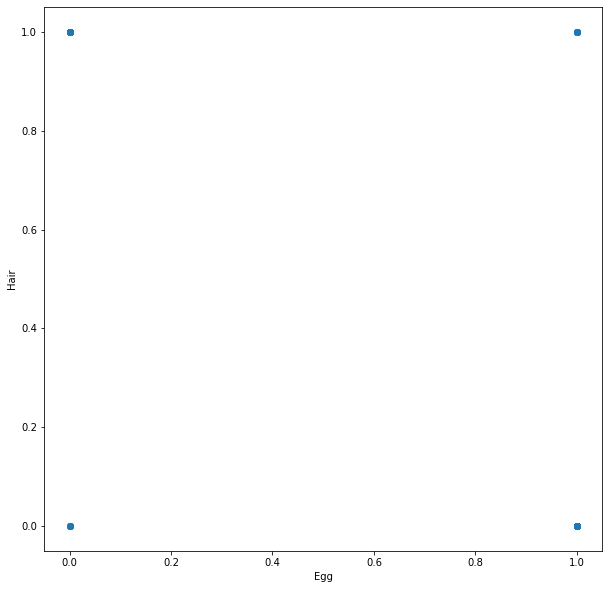

In [21]:
x = np.array(zoo.loc[:,"eggs"]).reshape(-1,1)
y = np.array(zoo.loc[:,'hair']).reshape(-1,1)

plt.figure(figsize=[10,10])
plt.scatter(x=x,y=y)
plt.xlabel('Egg')
plt.ylabel('Hair')
plt.show()

# Linear Regression

R^2 Score:  0.6681125904754137


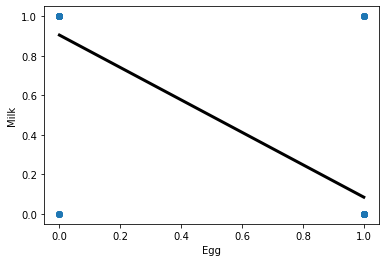

In [22]:
# Plotting regression line and scatter
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

predict_space = np.linspace(min(x),max(x)).reshape(-1,1)
regression.fit(x,y)
predicted = regression.predict(predict_space)

print("R^2 Score: ",regression.score(x,y))

plt.plot(predict_space, predicted, color='black', linewidth=3)
plt.scatter(x=x,y=y)
plt.xlabel('Egg')
plt.ylabel('Milk')
plt.show()

## Ridge

In [23]:
from sklearn.linear_model import Ridge
import warnings
warnings.filterwarnings('ignore')
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 2, test_size = 0.3)
ridge = Ridge(alpha= 0.001,normalize = True)
ridge.fit(x_train,y_train)
ridge_predict = ridge.predict(x_test)
print("Ridge Score: ",ridge.score(x_test,y_test))

Ridge Score:  0.9302397279928529


## Lasso

In [24]:
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings('ignore')
x = np.array(zoo.loc[:,['eggs','airborne','fins','legs',"hair","type"]])
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 3, test_size = 0.3)
lasso = Lasso(alpha = 0.0001, normalize = True)
lasso.fit(x_train,y_train)
ridge_predict = lasso.predict(x_test)
print('Lasso score: ',lasso.score(x_test,y_test))
print('Lasso coefficients: ',lasso.coef_)

Lasso score:  0.9999970989932222
Lasso coefficients:  [-0.         -0.         -0.          0.          0.99830154 -0.        ]


In [25]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
x,y = zoo.loc[:,zoo.columns != "hair"], zoo.loc[:,"hair"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1 )
rf = RandomForestClassifier(random_state = 4)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print("Confisuon Matrix: \n",cm)
print("Classification Report: \n",classification_report(y_test,y_pred))

Confisuon Matrix: 
 [[14  1]
 [ 2 14]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.93      0.88      0.90        16

    accuracy                           0.90        31
   macro avg       0.90      0.90      0.90        31
weighted avg       0.91      0.90      0.90        31



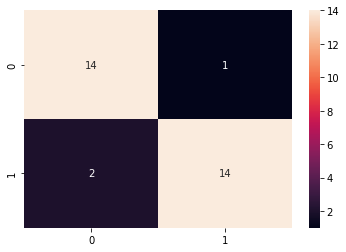

In [26]:
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

# Logistic Regression

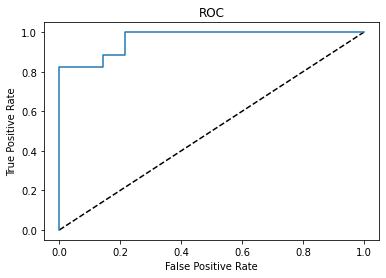

In [27]:
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
#hair = 1 no = 0 
x,y = zoo.loc[:,(zoo.columns != 'hair')], zoo.loc[:,'hair']
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state=42)
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred_prob = logreg.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

# Grid Search validation

In [29]:
 # grid search cross validation with 1 hyperparameter
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=3) # GridSearchCV
knn_cv.fit(x,y)# Fit

# Print hyperparameter
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
print("Best score: {}".format(knn_cv.best_score_))

Tuned hyperparameter k: {'n_neighbors': 29}
Best score: 0.6232917409387998


In [30]:
# grid search cross validation with 2 hyperparameter
# 1. hyperparameter is C:logistic regression regularization parameter
# 2. penalty l1 or l2
# Hyperparameter grid
param_grid = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2']}
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 12)
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,param_grid,cv=3)
logreg_cv.fit(x_train,y_train)

# Print the optimal parameters and best score
print("Tuned hyperparameters : {}".format(logreg_cv.best_params_))
print("Best Accuracy: {}".format(logreg_cv.best_score_))

Tuned hyperparameters : {'C': 0.1, 'penalty': 'l2'}
Best Accuracy: 0.9299516908212562


In [31]:
# get_dummies
df = pd.get_dummies(zoo)
df.head(10)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,6,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,7,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,8,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,9,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


# Support Vector Machine

In [32]:
# SVM, pre-process and pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
steps = [('scalar', StandardScaler()),
         ('SVM', SVC())]
pipeline = Pipeline(steps)
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 1)
cv = GridSearchCV(pipeline,param_grid=parameters,cv=3)
cv.fit(x_train,y_train)

y_pred = cv.predict(x_test)

print("Accuracy: {}".format(cv.score(x_test, y_test)))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.9523809523809523
Tuned Model Parameters: {'SVM__C': 1, 'SVM__gamma': 0.01}


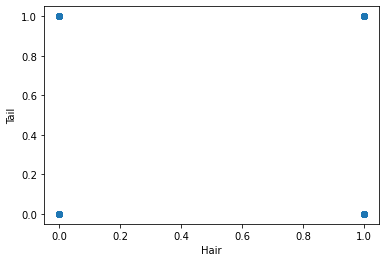

In [33]:
plt.scatter(zoo['hair'],zoo['tail'])
plt.xlabel('Hair')
plt.ylabel('Tail')
plt.show()

# K-menans Clustering

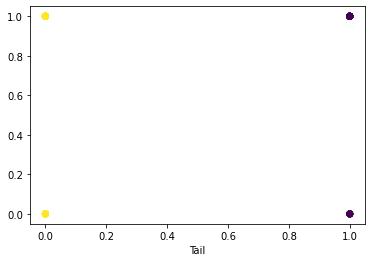

In [34]:
data2 = zoo.loc[:,['tail','hair']]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(data2)
labels = kmeans.predict(data2)
plt.scatter(zoo['hair'],zoo['tail'],c = labels)
plt.xlabel('Hair')
plt.xlabel('Tail')
plt.show()

In [35]:
# cross tabulation table
df = pd.DataFrame({'labels':labels,"hair":zoo['hair']})
ct = pd.crosstab(df['labels'],df['hair'])
print(ct)

hair     0   1
labels        
0        0  43
1       58   0


In [ ]:
data2 = zoo.drop("hair",axis=1)

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
scalar = StandardScaler()
kmeans = KMeans(n_clusters = 2)
pipe = make_pipeline(scalar,kmeans)
pipe.fit(data2)
labels = pipe.predict(data2)
df = pd.DataFrame({'labels':labels,"hair":zoo['hair']})
ct = pd.crosstab(df['labels'],df['hair'])
print(ct)

hair     0   1
labels        
0       58   0
1        0  43


# Dendogram

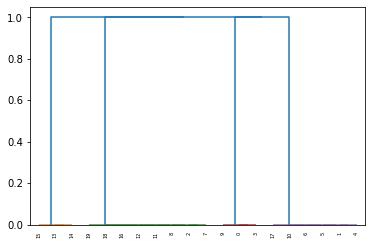

In [38]:
from scipy.cluster.hierarchy import linkage,dendrogram

merg = linkage(data2.iloc[:20,0:5],method = 'single')
dendrogram(merg, leaf_rotation = 90, leaf_font_size = 5)
plt.show()

## t-distributed Stochastic Neighbor Embedding

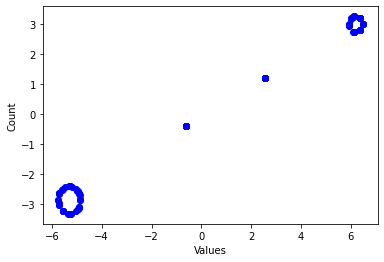

In [52]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate=100,random_state=42)
transformed = model.fit_transform(data2)
x = transformed[:,0]
y = transformed[:,1]
plt.scatter(x,y,c = 'blue')
plt.xlabel('Values')
plt.ylabel('Count')
plt.show()

# PCA

In [51]:
from sklearn.decomposition import PCA
model = PCA()
model.fit(data2[0:4])
transformed = model.transform(data2[0:4])
print('Principle components: ',model.components_)

Principle components:  [[ 0.78820544 -0.61541221]
 [ 0.61541221  0.78820544]]


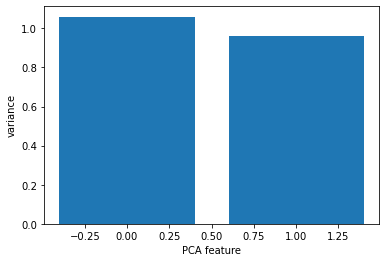

In [46]:
# PCA variance
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler,pca)
pipeline.fit(data2)

plt.bar(range(pca.n_components_), pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.show()

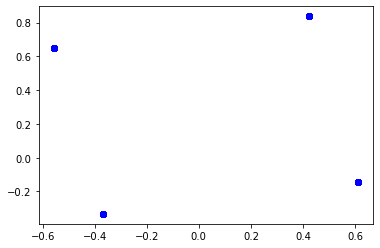

In [50]:
# apply PCA
pca = PCA(n_components = 2)
pca.fit(data2)
transformed = pca.transform(data2)
x = transformed[:,0]
y = transformed[:,1]
plt.scatter(x,y,c = 'blue')
plt.show()

# Glass data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
glass = pd.read_csv(r"C:\Users\Madhu\Downloads\glass.csv")

In [ ]:
glass

In [ ]:
glass.head()

In [ ]:
glass.tail()

In [ ]:
glass['Type'].value_counts()

In [ ]:
glass.info()

In [ ]:
glass.describe()

In [ ]:
glass[glass.duplicated()].shape

In [ ]:
glass[glass.duplicated()]

In [ ]:
df = glass.drop_duplicates()

In [ ]:
df

# Data exploration and visualization

In [ ]:
# correlation matrix
corr = df.corr()

In [ ]:
corr

In [ ]:
sns.heatmap(corr)

### We can notice that Ca and K values don't affect Type that much.

### Also Ca and RI are highly correlated, this means using only RI is enough.

### So we can go ahead and drop Ca, and also K.(performed later)

## Scatter plot of two features,and pairwise plot

In [ ]:
sns.scatterplot(df['RI'],df['Na'],hue=df['Type'])

### Suppose we consider only RI, and Na values for classification for glass type.

### From the above plot, We first calculate the nearest neighbors from the new data point to be calculated.
### If the majority of nearest neighbors belong to a particular class, say type 4, then we classify the data point as type 4.
### But there are a lot more than two features based on which we can classify. So

In [ ]:
#pairwise plot of all the features
sns.pairplot(df,hue='Type')
plt.show()

### The pairplot shows that the data is not linear and KNN can be applied to get nearest neighbors and classify the glass types


### Feature Scaling

### Scaling is necessary for distance-based algorithms such as KNN. This is to avoid higher weightage being assigned to data with a higher magnitude.

### Using standard scaler we can scale down to unit variance.

In [ ]:
glass= glass.iloc[:,0:9]
glass

In [ ]:
ary= glass.values

In [ ]:
ary

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(df.drop('Type',axis=1))

In [ ]:
StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
#perform transformation
scaled_features = scaler.transform(df.drop('Type',axis=1))
scaled_features

In [ ]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()


# Applying KNN

#### * Drop features that are not required

#### * Use random state while splitting the data to ensure reproducibility and consistency

#### * Experiment with distance metrics - Euclidean, manhattan

In [ ]:
dff = df_feat.drop(['Ca','K'],axis=1) #Removing features - Ca and K 
X_train,X_test,y_train,y_test  = train_test_split(dff,df['Type'],test_size=0.3,random_state=45) 
#setting random state ensures split is same eveytime, so that the results are com

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4,metric='manhattan')

In [ ]:
knn.fit(X_train,y_train)

In [ ]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
print(classification_report(y_test,y_pred))

In [ ]:
accuracy_score(y_test,y_pred)

## Visualizing the CV resuits

In [ ]:
k_range = range(1,25)
k_scores = []
error_rate =[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    #kscores - accuracy
    scores = cross_val_score(knn,dff,df['Type'],cv=5,scoring='accuracy')
    k_scores.append(scores.mean())
    
    #error rate
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred!=y_test))

#plot k vs accuracy
plt.plot(k_range,k_scores)
plt.xlabel('value of k - knn algorithm')
plt.ylabel('Cross validated accuracy score')
plt.show()

#plot k vs error rate
plt.plot(k_range,error_rate)
plt.xlabel('value of k - knn algorithm')
plt.ylabel('Error rate')
plt.show()

## we can see that k=4 produces the most accurate results

## Findings
#### Manhattan distance produced better results (improved accuracy - more than 5%)

#### Applying feature scaling improved accuracy by almost 5%.

#### The best k value was found to be 4.

#### Dropping ‘Ca’ produced better results by a bit, ‘K’ feature did not affect results in any way.

#### Also, we noticed that RI and Ca are highly correlated, this makes sense as it was found that the Refractive index of glass was found to increase with the increase in Cao

